![img](https://drive.google.com/uc?export=view&id=1kgX98Ziw9LzgBCT2BxChttfrTcBltLej)

# Sección nueva

# LISTADO DE VARIABLES DE LA BASE BANCO
### Esta base corresponde a una muestra de clientes del banco que son titulares de tarjeta cordobesa y que han tenido consumos (en pesos o dólares) durante los últimos 6 meses.
* Id: identificación del cliente
* ANTIGÜEDAD: meses desde fecha de alta del producto tarjeta de crédito Cordobesa (sin incluir tarjetas prepagas). Corresponde 0 si la antigüedad no llega al mes. 
* SALDO_TOTAL: saldo total de la tarjeta del banco (deuda total), es decir, facturación del último resumen más caída de cuotas. 
* SALDO_RESUMEN: saldo actual (saldo pesos + saldo dólar pesificado) facturado en último resumen de tarjeta de crédito Cordobesa.
* CANT_TARJETAS: cantidad de tarjetas titulares activas por cliente al mes de observación. 
* EDAD: edad del cliente en años transcurridos desde el nacimiento hasta el día en el que se ejecute la recarga de los datos del período. Se expresa como número entero, sin porción decimal. 
* ESTADO_CIVIL: estado civil del cliente.
* SEXO: sexo del cliente
* CUENTA_BASICA: 1 si el cliente tiene una cuenta básica y 0 si no tiene.
* INGRESOS_NETOS: ingresos netos mensuales del cliente (en pesos).
* MAXIMA_MORA: cantidad máxima de días que estuvo en mora en los últimos 12 meses. Si no tuvo mora corresponde 0. 
* ENDEUDAMIENTO: ratio entre (suma de cuotas de préstamos + cuotas a vencer de todas las tarjetas de crédito) / Ingreso Neto. 
* SIT_MAYOR1: variable que cuenta la cantidad de veces que el cliente registra situación superior a 1 en el BCRA en los últimos dos años (incluyendo el periodo de análisis. Total: 25 meses).  Se imputa missing aquellos clientes que no tuvieron situación en el BCRA mayor a 1 en el periodo anteriormente mencionado.
* SEGMENTO: segmento al cual pertenece el cliente.
* SITUACIÓN: variable que informa sobre la peor situación del cliente ante entidades financieras .  Dicha variable es informada por el BCRA.
* DIRTY: Variable binaria, corresponde 1 si el cliente tuvo al menos una situación mayor a 1 en Bancor en los últimos 24 meses.

In [ ]:
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd
import statsmodels.api as sm

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
import matplotlib.font_manager
from matplotlib import style
from matplotlib import rcParams
style.use('ggplot') or plt.style.use('ggplot')
import seaborn as sns
from seaborn import boxplot

# Preprocesado y modelado
# ==============================================================================
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# Subimos el dataset cualquiera sea su ubicacion con el siguiente script.
from google.colab import files
files.upload()

Saving Banco.xlsx to Banco.xlsx


{'Banco.xlsx': b'PK\x03\x04\x14\x00\x06\x00\x08\x00\x00\x00!\x00b\xee\x9dh^\x01\x00\x00\x90\x04\x00\x00\x13\x00\x08\x02[Content_Types].xml \xa2\x04\x02(\xa0\x00\x02\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00

In [ ]:
df = pd.read_excel("Banco.xlsx",  parse_dates=True, engine="openpyxl")
df.columns = df.columns.str.capitalize()
df

,Id,Antigüedad,Saldo_total,Saldo_resumen,Cant_tarjetas,Edad,Estado_civil,Sexo,Cuenta_basica,Ingresos_netos,Maxima_mora,Endeudamiento,Sit_mayor1,Segmento,Situacion,Dirty
0,1,78,1465.534634,1465.534634,1,84,Viudo/a,FEMENINO,0,8647.635534,11,0.000000,0,JUBILADO NACION,1,0
1,2,102,31104.196271,8184.041677,1,75,Viudo/a,FEMENINO,0,25330.438252,11,0.255926,0,JUBILADO NACION,1,0
2,3,51,30274.746104,3281.897991,1,79,Casado/a,FEMENINO,0,9718.295172,7,0.253693,0,JUBILADO NACION,0,0
3,4,114,2883.858113,2883.858113,1,85,Viudo/a,FEMENINO,0,19585.067520,6,0.000000,0,JUBILADO NACION,0,0
4,5,69,0.000000,0.000000,1,71,Soltero/a,FEMENINO,0,17472.747694,8,0.000000,0,JUBILADO NACION,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6912,6913,17,58308.459709,8723.136878,2,39,Casado/a,MASCULINO,0,48031.206516,55,0.678187,1,CONVENIO,3,1
6913,6914,11,64481.983742,19734.184400,1,28,Soltero/a,FEMENINO,0,21384.193304,0,0.533368,13,CONVENIO,3,0
6914,6915,111,10402.873485,2887.592917,2,63,Soltero/a,FEMENINO,0,57657.863431,44,0.293183,4,JUBILADO NACION,1,0
6915,6916,70,156792.803410,119363.341380,2,60,Casado/a,MASCULINO,0,102695.166890,8,0.421885,3,INDEFINIDOS,1,0


### Realizamos un análisis descriptivo de los datos del dataset Banco

In [ ]:
df.shape

(6917, 16)

In [ ]:
df.columns

Index(['Id', 'Antigüedad', 'Saldo_total', 'Saldo_resumen', 'Cant_tarjetas',
       'Edad', 'Estado_civil', 'Sexo', 'Cuenta_basica', 'Ingresos_netos',
       'Maxima_mora', 'Endeudamiento', 'Sit_mayor1', 'Segmento', 'Situacion',
       'Dirty'],
      dtype='object')

In [ ]:
df=df.drop(["Id"],axis=1)
df

,Antigüedad,Saldo_total,Saldo_resumen,Cant_tarjetas,Edad,Estado_civil,Sexo,Cuenta_basica,Ingresos_netos,Maxima_mora,Endeudamiento,Sit_mayor1,Segmento,Situacion,Dirty
0,78,1465.534634,1465.534634,1,84,Viudo/a,FEMENINO,0,8647.635534,11,0.000000,0,JUBILADO NACION,1,0
1,102,31104.196271,8184.041677,1,75,Viudo/a,FEMENINO,0,25330.438252,11,0.255926,0,JUBILADO NACION,1,0
2,51,30274.746104,3281.897991,1,79,Casado/a,FEMENINO,0,9718.295172,7,0.253693,0,JUBILADO NACION,0,0
3,114,2883.858113,2883.858113,1,85,Viudo/a,FEMENINO,0,19585.067520,6,0.000000,0,JUBILADO NACION,0,0
4,69,0.000000,0.000000,1,71,Soltero/a,FEMENINO,0,17472.747694,8,0.000000,0,JUBILADO NACION,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6912,17,58308.459709,8723.136878,2,39,Casado/a,MASCULINO,0,48031.206516,55,0.678187,1,CONVENIO,3,1
6913,11,64481.983742,19734.184400,1,28,Soltero/a,FEMENINO,0,21384.193304,0,0.533368,13,CONVENIO,3,0
6914,111,10402.873485,2887.592917,2,63,Soltero/a,FEMENINO,0,57657.863431,44,0.293183,4,JUBILADO NACION,1,0
6915,70,156792.803410,119363.341380,2,60,Casado/a,MASCULINO,0,102695.166890,8,0.421885,3,INDEFINIDOS,1,0


In [ ]:
numericas= df[['Antigüedad', 'Saldo_total', 'Saldo_resumen', 'Cant_tarjetas',
       'Edad', 'Estado_civil', 'Sexo', 'Cuenta_basica', 'Ingresos_netos',
       'Maxima_mora', 'Endeudamiento', 'Sit_mayor1', 'Segmento', 'Situacion',
       'Dirty' ]]
numericas

,Antigüedad,Saldo_total,Saldo_resumen,Cant_tarjetas,Edad,Estado_civil,Sexo,Cuenta_basica,Ingresos_netos,Maxima_mora,Endeudamiento,Sit_mayor1,Segmento,Situacion,Dirty
0,78,1465.534634,1465.534634,1,84,Viudo/a,FEMENINO,0,8647.635534,11,0.000000,0,JUBILADO NACION,1,0
1,102,31104.196271,8184.041677,1,75,Viudo/a,FEMENINO,0,25330.438252,11,0.255926,0,JUBILADO NACION,1,0
2,51,30274.746104,3281.897991,1,79,Casado/a,FEMENINO,0,9718.295172,7,0.253693,0,JUBILADO NACION,0,0
3,114,2883.858113,2883.858113,1,85,Viudo/a,FEMENINO,0,19585.067520,6,0.000000,0,JUBILADO NACION,0,0
4,69,0.000000,0.000000,1,71,Soltero/a,FEMENINO,0,17472.747694,8,0.000000,0,JUBILADO NACION,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6912,17,58308.459709,8723.136878,2,39,Casado/a,MASCULINO,0,48031.206516,55,0.678187,1,CONVENIO,3,1
6913,11,64481.983742,19734.184400,1,28,Soltero/a,FEMENINO,0,21384.193304,0,0.533368,13,CONVENIO,3,0
6914,111,10402.873485,2887.592917,2,63,Soltero/a,FEMENINO,0,57657.863431,44,0.293183,4,JUBILADO NACION,1,0
6915,70,156792.803410,119363.341380,2,60,Casado/a,MASCULINO,0,102695.166890,8,0.421885,3,INDEFINIDOS,1,0


In [ ]:
numericas.describe()

,Antigüedad,Saldo_total,Saldo_resumen,Cant_tarjetas,Edad,Cuenta_basica,Ingresos_netos,Maxima_mora,Endeudamiento,Sit_mayor1,Situacion,Dirty
count,6917.000000,6917.000000,6917.000000,6917.000000,6917.00000,6917.000000,6917.000000,6917.000000,6917.000000,6917.000000,6917.000000,6917.000000
mean,75.247506,26720.965021,9381.122555,1.127512,51.97976,0.045829,35419.757201,6.891571,189.492583,1.946942,0.913835,0.097441
std,36.044680,29456.296692,12262.456577,0.502960,14.78713,0.209129,26180.927097,16.755646,1549.238900,4.802904,1.070845,0.296579
min,0.000000,0.000000,0.000000,0.000000,20.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,44.000000,6942.595260,2402.750653,1.000000,40.00000,0.000000,18935.479875,0.000000,0.079360,0.000000,0.000000,0.000000
50%,86.000000,18683.037213,5741.838547,1.000000,52.00000,0.000000,32458.502686,0.000000,0.223929,0.000000,1.000000,0.000000
75%,111.000000,37143.986583,12289.874351,1.000000,64.00000,0.000000,46276.159894,4.000000,0.401053,1.000000,1.000000,0.000000
max,115.000000,440168.612690,300739.894240,3.000000,96.00000,1.000000,399559.040970,138.000000,66273.400000,25.000000,5.000000,1.000000


In [ ]:
# Importamos pandas profiling para obtener el informe de las variables numéricas
#import pandas_profiling as pp

In [ ]:
#Ejecutamos el reporte
#pp.ProfileReport(numericas)

In [ ]:
#matriz de correlación
corrnumericas = numericas.corr(method='pearson')
corrnumericas

,Antigüedad,Saldo_total,Saldo_resumen,Cant_tarjetas,Edad,Cuenta_basica,Ingresos_netos,Maxima_mora,Endeudamiento,Sit_mayor1,Situacion,Dirty
Antigüedad,1.000000,-0.053902,-0.049015,0.149558,0.271041,0.017869,0.246743,-0.182240,-0.057766,-0.126820,-0.075560,-0.174562
Saldo_total,-0.053902,1.000000,0.745544,0.164162,-0.187479,-0.034923,0.218639,0.051801,0.098468,0.105466,0.110804,0.131692
Saldo_resumen,-0.049015,0.745544,1.000000,0.133246,-0.165025,-0.013971,0.201447,0.081139,0.121761,0.091585,0.106089,0.158040
Cant_tarjetas,0.149558,0.164162,0.133246,1.000000,-0.006652,0.000796,0.269642,-0.098747,-0.009510,-0.016892,0.011006,-0.035810
Edad,0.271041,-0.187479,-0.165025,-0.006652,1.000000,0.055707,0.027321,-0.022273,-0.031253,-0.108435,-0.078658,-0.086427
Cuenta_basica,0.017869,-0.034923,-0.013971,0.000796,0.055707,1.000000,0.047344,-0.000191,-0.011254,-0.049834,-0.041119,-0.025385
Ingresos_netos,0.246743,0.218639,0.201447,0.269642,0.027321,0.047344,1.000000,-0.233657,-0.165309,-0.049770,-0.016684,-0.142727
Maxima_mora,-0.182240,0.051801,0.081139,-0.098747,-0.022273,-0.000191,-0.233657,1.000000,0.101649,0.115493,0.165582,0.492086
Endeudamiento,-0.057766,0.098468,0.121761,-0.009510,-0.031253,-0.011254,-0.165309,0.101649,1.000000,0.005579,0.044955,0.173156
Sit_mayor1,-0.126820,0.105466,0.091585,-0.016892,-0.108435,-0.049834,-0.049770,0.115493,0.005579,1.000000,0.619125,0.332922


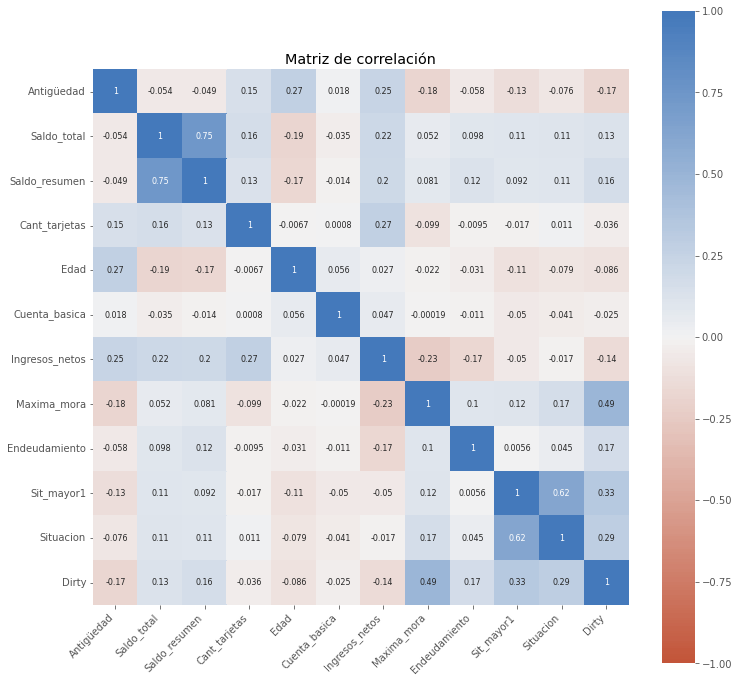

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 12))

sns.heatmap(corrnumericas,
    annot     = True,
    cbar      = True,
    annot_kws = {"size": 8},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = sns.diverging_palette(20, 250, n=200),
    square    = True,
    ax        = ax
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)

ax.tick_params(labelsize = 10)
plt.title('Matriz de correlación')
plt.show()

In [ ]:
# Para conocer el rango de edades de los clientes deeste banco hacemos la descripción de datos y posterior gráfico.
df.Edad.describe()

count    6917.00000
mean       51.97976
std        14.78713
min        20.00000
25%        40.00000
50%        52.00000
75%        64.00000
max        96.00000
Name: Edad, dtype: float64

Text(0.5, 1.0, 'Gráfico n° 1: Boxplot de la variable Edad')

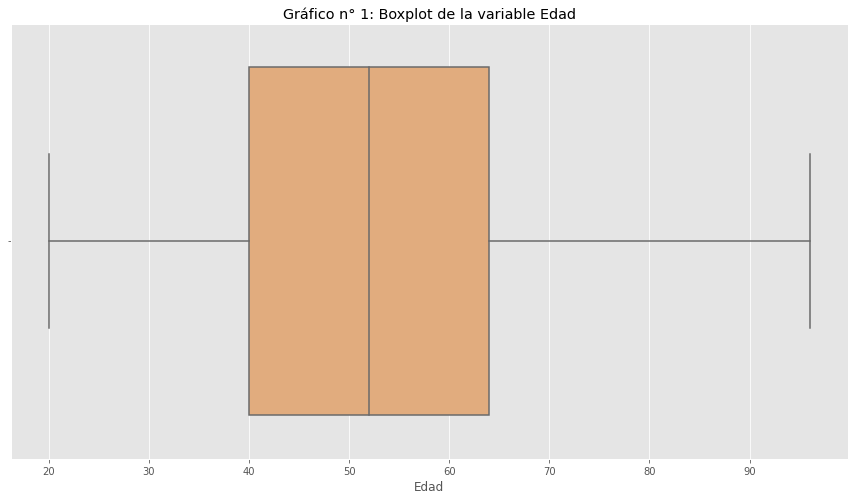

In [ ]:
# Hacemos el gráfico de caja para la variable edad.
rcParams['figure.figsize'] = 15,8
boxplot(df.Edad, color='#F2AB6D')
plt.title('Gráfico n° 1: Boxplot de la variable Edad')

Text(0, 0.5, 'Ingreso')

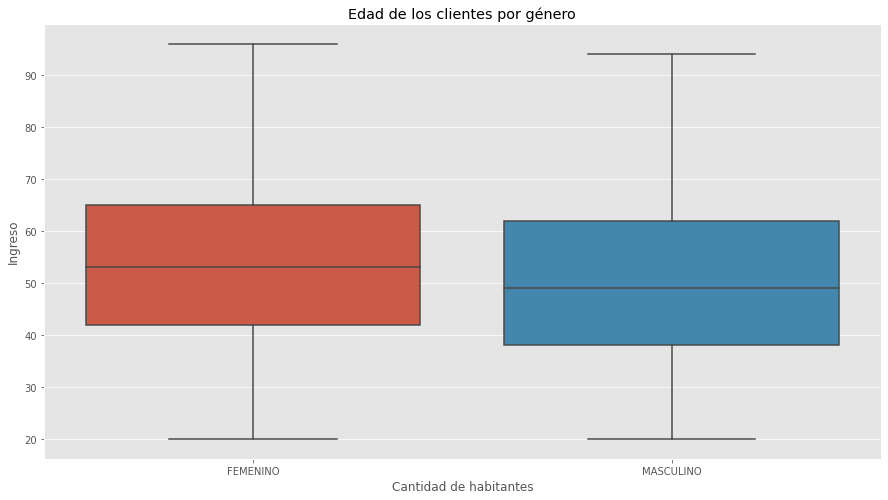

In [ ]:
# Realizamos el mismo procedimiento respecto al género
# Gráfico de caja según la edad segmentando según la Ocupación corregida.
sns.boxplot(  x= 'Sexo', y='Edad', data=df)
plt.title('Edad de los clientes por género')
plt.xlabel('Cantidad de habitantes')
plt.ylabel('Ingreso')

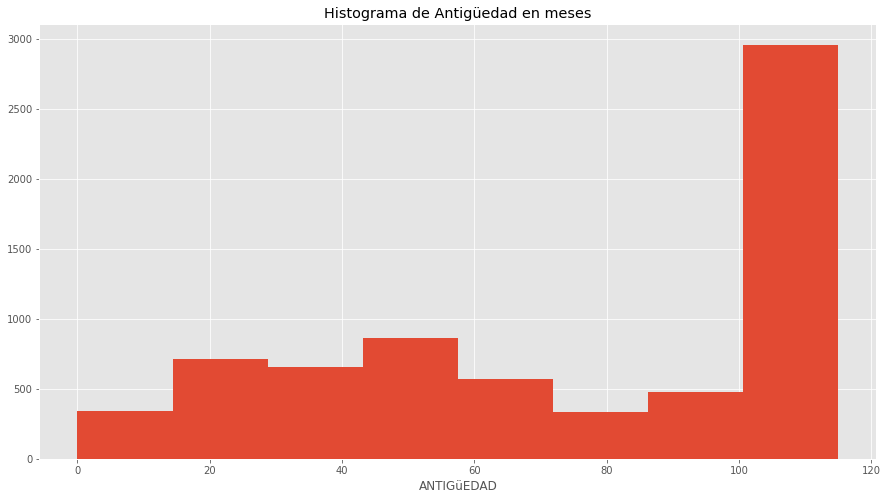

In [ ]:
# Realizamos histogramas para variables continuas en este caso antigüedad
antiguedad= df["Antigüedad"]
plt.figure()
plt.hist (antiguedad, bins =8)
plt.xlabel("ANTIGüEDAD")
plt.title ("Histograma de Antigüedad en meses")
plt.show()



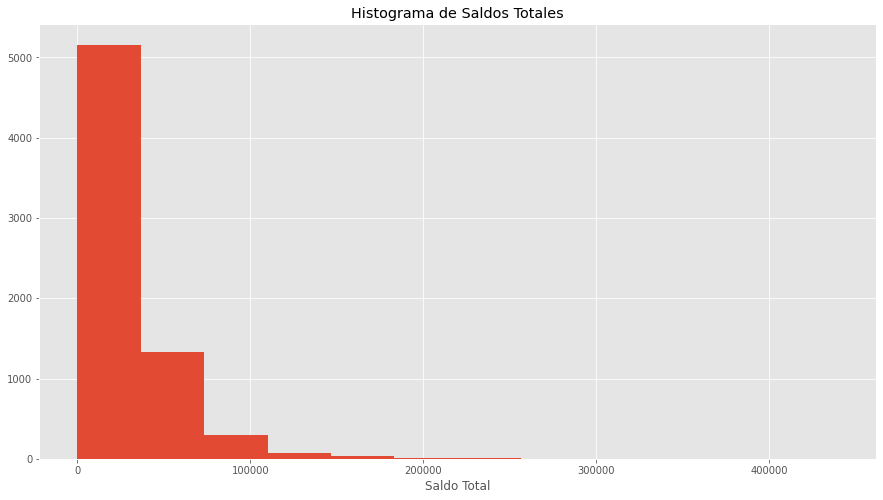

In [ ]:
# Realizamos histogramas para variables continuas en este caso Saldos
saldos= df["Saldo_total"]
plt.figure(figsize=(15,8))
plt.hist (saldos, bins =12, rwidth=10,)
plt.xlabel("Saldo Total")
plt.title ("Histograma de Saldos Totales")
plt.show()